In [ ]:
#Data Collection
import pandas as pd
df=pd.read_csv("data.csv",delimiter=";",encoding="utf-8")
print(df.head(10))

   Marital status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   
5               2                39                  1    9991   
6               1                 1                  1    9500   
7               1                18                  4    9254   
8               1                 1                  3    9238   
9               1                 1                  1    9238   

   Daytime/evening attendance\t  Previous qualification  \
0                             1                       1   
1                             1                       1   
2                             1                       1   
3                             1      

In [ ]:
#Data Cleaning
import pandas as pd
import numpy as np
df.ffill(inplace=True) #Forward filling of null values
print(df.isnull().sum()) #Check if any null values present

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

Number of constant features: 0
Number of quasi constant features: 0
Number of duplicate features: 0


/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.draw()


Mutual Information Scores:
 Curricular units 2nd sem (approved)               0.313710
Curricular units 1st sem (approved)               0.240909
Curricular units 2nd sem (grade)                  0.231172
Curricular units 1st sem (grade)                  0.183279
Tuition fees up to date                           0.098910
Curricular units 1st sem (evaluations)            0.074449
Course                                            0.073935
Curricular units 2nd sem (evaluations)            0.069986
Age at enrollment                                 0.060001
Curricular units 2nd sem (enrolled)               0.054088
Scholarship holder                                0.044551
Previous qualification (grade)                    0.042754
Application mode                                  0.040040
Curricular units 1st sem (enrolled)               0.039497
Gender                                            0.039141
Admission grade                                   0.034315
Father's occupation         

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


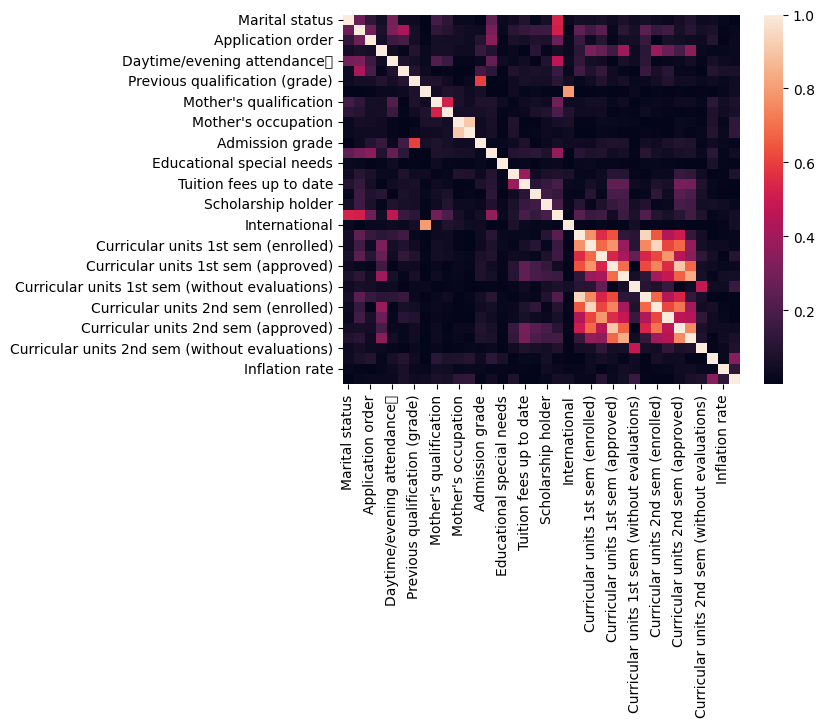

In [ ]:
#Feature Selection
from sklearn.model_selection import train_test_split
import numpy as np
X_train, X_test, y_train, y_test = train_test_split(df.drop("Target",axis=1),df["Target"],test_size = 0.3, random_state=0)

#1.Removing Constant features
const = []
for features in X_train:
  if(X_train[features].std()==0):
    const.append(features)
print("Number of constant features:",len(const))
X_train.drop(labels=const,axis=1,inplace=True)
X_test.drop(labels=const,axis=1,inplace=True)

#2.Removing quasi constant features
quasi_constant = []
for feature in X_train.columns:
  predominant = (X_train[feature].value_counts()/float(len(X_train))).sort_values(ascending=False).values[0]
  if(predominant>0.999):
    quasi_constant.append(feature)
print("Number of quasi constant features:",len(quasi_constant))
X_train.drop(labels=quasi_constant,axis=1,inplace=True)
X_test.drop(labels=quasi_constant,axis=1,inplace=True)#Apply same removal to X_test

#3.Duplicated features
duplicates = []
for i in range(len(X_train.columns)):
  col1 = X_train.columns[i]
  for col2 in X_train.columns[i+1:]:
    if(X_train[col1].equals(X_train[col2])): #Not ==, as it won't return a single True of False
      duplicates.append(col2)
print("Number of duplicate features:",len(duplicates))
X_train.drop(labels=duplicates,axis=1,inplace=True)
X_test.drop(labels=duplicates,axis=1,inplace=True)#Apply same removal to X_test

#4.Correlation
import matplotlib.pyplot as plt
import seaborn as sns
corr=X_train.corr().abs()
fig,ax=plt.subplots()
fig.set_size_inches=(25,25)
sns.heatmap(corr)
X_train = X_train.loc[:, ~X_train.T.duplicated()]
X_test = X_test[X_train.columns]  #Apply same removal to X_test

#5.Mutual Information
from sklearn.feature_selection import mutual_info_classif
import pandas as pd
mi_scores = mutual_info_classif(X_train, y_train, discrete_features='auto')
mi = pd.Series(mi_scores, index=X_train.columns)
mi = mi.sort_values(ascending=False)
print("Mutual Information Scores:\n", mi)
top_k = 20
top_features = mi.head(top_k).index
# Keep only these features in both train and test sets
X_train = X_train[top_features]
X_test = X_test[top_features]








